# Question2: Time Series Analysis and Forecasting                                                          

* You are provided with daily stock market data. 
* Your objective is to analyze and forecast the Closing Price of stock trades using time series modeling techniques, especially ARIMA.
* Follow the steps below using Python libraries such as pandas, matplotlib, statsmodels, and sklearn.

## Part A: Exploratory Data Analysis
1. **```Load and Prepare the Dataset:```**
- Using yfinance library in python Load the dataset for any ONE of the stock ticker like "TSLA", "AAPL", "AMZN", "GOOGL" or any of your choice into a Pandas DataFrame.

In [1]:
import yfinance as yf

nvda = yf.download(
    "NVDA",
    start="2015-01-01",
    end="2025-11-15",
    auto_adjust=True
)

[*********************100%***********************]  1 of 1 completed


In [2]:
nvda.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-01-02,0.483038,0.486638,0.475360,0.483038,113680000
2015-01-05,0.474880,0.484478,0.472720,0.483038,197952000
2015-01-06,0.460482,0.476080,0.460002,0.475600,197764000
2015-01-07,0.459282,0.467921,0.457843,0.463842,321808000
2015-01-08,0.476559,0.479439,0.464321,0.464561,283780000


In [3]:
nvda.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-11-10,199.050003,199.940002,193.789993,195.110001,198897100
2025-11-11,193.160004,195.419998,191.300003,195.160004,176483300
2025-11-12,193.800003,195.889999,191.130005,195.720001,154935300
2025-11-13,186.860001,191.440002,183.850006,191.050003,207423100
2025-11-14,190.169998,191.009995,180.580002,182.860001,186591900


In [4]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2735 entries, 2015-01-02 to 2025-11-14
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   2735 non-null   float64
 1   (High, NVDA)    2735 non-null   float64
 2   (Low, NVDA)     2735 non-null   float64
 3   (Open, NVDA)    2735 non-null   float64
 4   (Volume, NVDA)  2735 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.2 KB


In [5]:
nvda.isnull().sum()

Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64

- **Parse the Date column as a datetime object and set it as the index.**

In [6]:
type(nvda.index)

pandas.core.indexes.datetimes.DatetimeIndex

- **Display summary statistics and data types.**

In [7]:
nvda.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,2735.000000,2735.000000,2735.000000,2735.000000,2.735000e+03
mean,31.124896,31.656831,30.534416,31.124276,4.482310e+08
std,47.531720,48.293795,46.694223,47.559070,2.534400e+08
min,0.459282,0.467921,0.454483,0.463602,5.244800e+07
25%,3.740769,3.810946,3.659955,3.747837,2.838840e+08
50%,8.935949,9.146897,8.722008,9.017140,3.978650e+08
75%,27.926349,28.405559,27.300334,27.818433,5.429760e+08
max,207.039993,212.190002,205.559998,208.080002,3.692928e+09


2. **```Visualizations:```**

    - **Plot a line chart of the Close over time.**

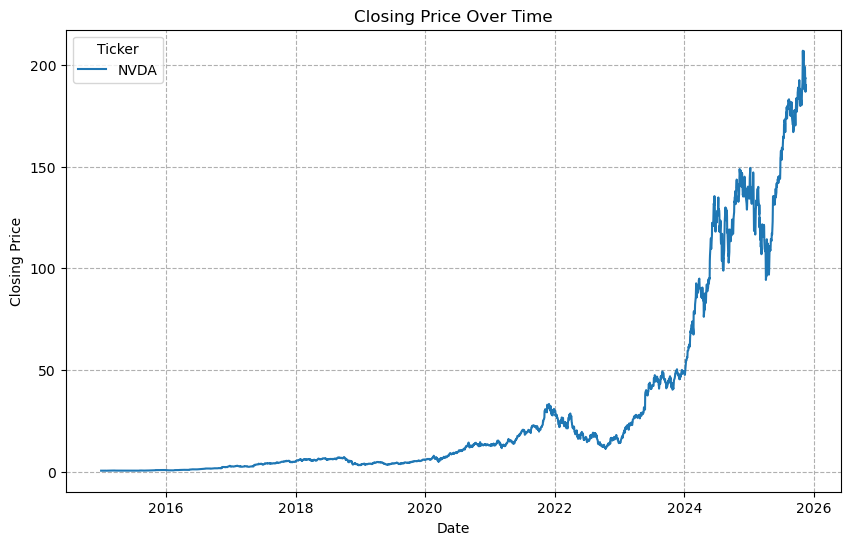

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(nvda['Close'],color=sns.color_palette(palette='Reds')[2])
plt.title('Closing Price Over Time')
plt.ylabel('Closing Price')
plt.grid(linestyle='--') 
plt.show()

- **Create histograms for all key numeric variables (e.g., Open, Close, Volume) to understand their distributions.**

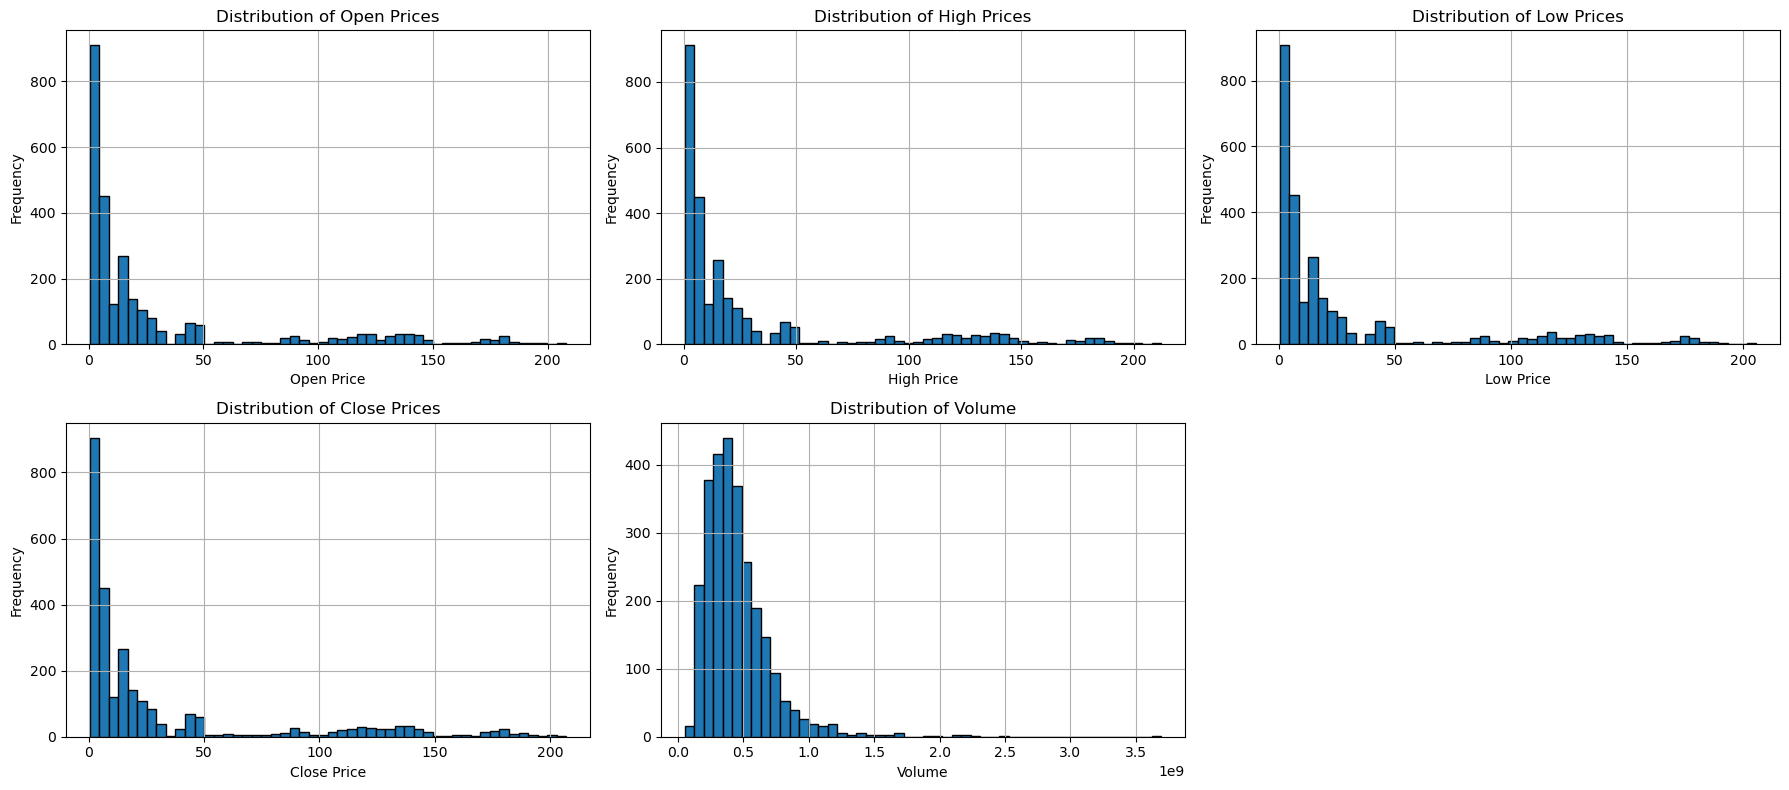

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Open
axes[0, 0].hist(nvda['Open'], bins=50, edgecolor='black')
axes[0, 0].set_title('Distribution of Open Prices')
axes[0, 0].set_xlabel('Open Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True)

# High
axes[0, 1].hist(nvda['High'], bins=50, edgecolor='black')
axes[0, 1].set_title('Distribution of High Prices')
axes[0, 1].set_xlabel('High Price')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True)

# Low
axes[0, 2].hist(nvda['Low'], bins=50, edgecolor='black')
axes[0, 2].set_title('Distribution of Low Prices')
axes[0, 2].set_xlabel('Low Price')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(True)

# Close
axes[1, 0].hist(nvda['Close'], bins=50, edgecolor='black')
axes[1, 0].set_title('Distribution of Close Prices')
axes[1, 0].set_xlabel('Close Price')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True)

# Volume
axes[1, 1].hist(nvda['Volume'], bins=50, edgecolor='black')
axes[1, 1].set_title('Distribution of Volume')
axes[1, 1].set_xlabel('Volume')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## Part B: Moving Average and Trend Analysis
3. **```Moving Average:```**

- **Explain the purpose of a moving average in time series analysis.**

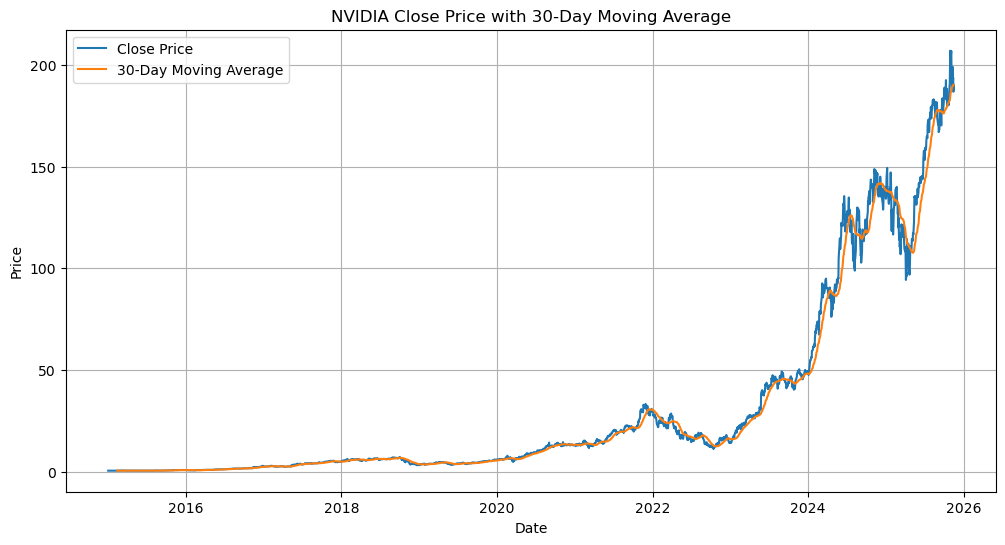

In [10]:
nvda['MA30'] = nvda['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(nvda['Close'], label='Close Price')
plt.plot(nvda['MA30'], label='30-Day Moving Average')
plt.title('NVIDIA Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

- **Calculate a 7-day moving average for the Close column.**

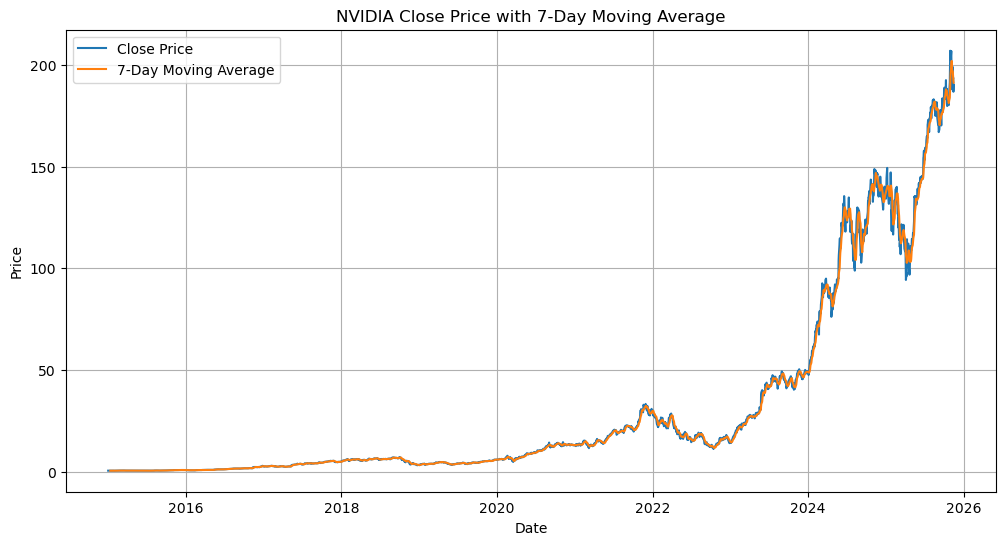

In [11]:
nvda['MA7'] = nvda['Close'].rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(nvda['Close'], label='Close Price')
plt.plot(nvda['MA7'], label='7-Day Moving Average')
plt.title('NVIDIA Close Price with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

- **Plot the original Close and its moving average on the same chart for comparison.**

## Part C: Time Series Decomposition
4. **```Decomposition:```**

- **Decompose the Close time series into Trend, Seasonality, and Residuals using seasonal_decompose.**

- **Visualize each component using appropriate plots.**

- **Provide a brief explanation of what each component reveals about the data.**

## Part D: Stationarity Check and ARIMA Forecasting
5. **```Check for Stationarity:```**

- **Explain why stationarity is important in time series forecasting.**

- **Use the Augmented Dickey-Fuller (ADF) test to check if the Volume series is stationary.**

- **Interpret the results of the ADF test (include p-value and conclusion).**

6. **```ARIMA Modeling and Forecasting:```**

- **Fit an ARIMA(1, 0, 0) model on the Close series.**

- **Forecast the next 30 days of Volume.**

- **Plot the predicted values against the original data.**

- **Evaluate the model using Mean Absolute Error (MAE).**

- **Comment on model performance: Is the forecast reasonable? Is the model overfitting or underfitting?**